# Round 1 of Exploratory Data Analysis (EDA) for QnA data at LLMOPs Project

This notebook includes the results and code of the first round of EDA on the QnA data part of the credit card benefits project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

In [2]:
%%time
#df_raw = pd.read_excel("local_data/raw_data_cms_3_teste_source.xlsx", "raw_data_cms_2")
df_raw = pd.read_csv(
    "local_data/raw_data_cms_3_teste_cleaned.csv", 
    dtype={
        'amigo contextualizada':str, 
        'atalhos':str,
        'intencao contextualizada':str,
        'relacionamentos':str,
        'texto_botao_contextualizada':str,
        'titulo_atalhos':str
    }
)
print(f"Raw shape: {df_raw.shape}")
print("Raw sample:")
df_raw.sample(5)

Raw shape: (39796, 465)
Raw sample:
CPU times: total: 2.73 s
Wall time: 6.37 s


,id,amigo contextualizada,assunto,atalhos,canal,chave,created_at,created_by,faqs relacionadas,id vignette,...,Unnamed: 455,Unnamed: 456,Unnamed: 457,Unnamed: 458,Unnamed: 459,Unnamed: 460,Unnamed: 461,Unnamed: 462,Unnamed: 463,Unnamed: 464
16769,16769,NaN,Saldo,NaN,NaN,,2021-05-14 18:40:17.371000+00:00,blt2db73e8283c60439,[],02dd3729e187e510VgnVCM2000009d3e3a0a____,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7018,7018,NaN,Planos Player's Bank,NaN,NaN,NaN,2023-03-22 19:55:17.274000+00:00,blt43949dc9b5ef8f15,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27530,27530,NaN,Compras no Cartão e Contestação,NaN,NaN,NaN,2023-01-27 20:26:32.529000+00:00,blt43949dc9b5ef8f15,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38499,38499,81139d1d-aaa8-404d-9a0f-f4fee375a64a,Tracking de cartões,NaN,537fb21b-3da3-4295-b99d-92d6227b2188,,2022-03-15 22:48:14.688000+00:00,bltd497be6c16d95e78,[],NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11477,11477,NaN,pagar,NaN,NaN,,2021-05-14 14:40:16.722000+00:00,blt2db73e8283c60439,[],b731cf6a03493710VgnVCM1000009c3e3a0a____,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Applying Known Filters
* **Assunto:** benefícios
* **Producto:** Cartão de Crédito
* **Tags**: Is not *rascunho*

In [3]:
df_raw = df_raw[df_raw['assunto'] == 'benefícios']
df_raw = df_raw[df_raw['produto'] == 'Cartão de Crédito']
df_raw = df_raw[df_raw['tags'] != "['rascunho']"]
print(df_raw.shape)

(661, 465)


In [4]:
columns = df_raw.columns[:35]

In [5]:
col_idx = 0

In [6]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 0: id

In [7]:
df_col_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
#df_col_freq[df_col_freq['count']>1]
print(f"Values of column {col_nm} that are not numeric and occurs only once")
print(df_col_freq[(df_col_freq['count']==1)&(~df_col_freq[col_nm].astype(str).str.isnumeric())])
print()
print(f"Indexes and values of column {col_nm} that are not numeric")
df_err = df_raw.loc[~df_raw[col_nm].astype(str).str.isnumeric(),col_nm]
print(f"Errors found: {df_err.shape[0]}")
df_err

Values of column id that are not numeric and occurs only once
Empty DataFrame
Columns: [id, count]
Index: []

Indexes and values of column id that are not numeric
Errors found: 0


Series([], Name: id, dtype: int64)

## Example of an error in column 1

![](local_data/data_quality_issues.png "Example of data quality issues")

In [8]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 1: amigo contextualizada

In [9]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,amigo contextualizada,count


In [10]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 2: assunto

In [11]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()


## Percentage of nulls 0.00%

,assunto,count
0,benefícios,661


## Highlights
* Can we use `assunto` to filter all the QnA related to *Cartâo da crédito*? DONE!

In [12]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 3: atalhos

In [13]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
atalhos,
[],661


In [14]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 4: canal

In [15]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
canal,


In [16]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 5: chave

In [17]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
chave,


In [18]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 6: created_at

## Percentage of nulls 0.00%

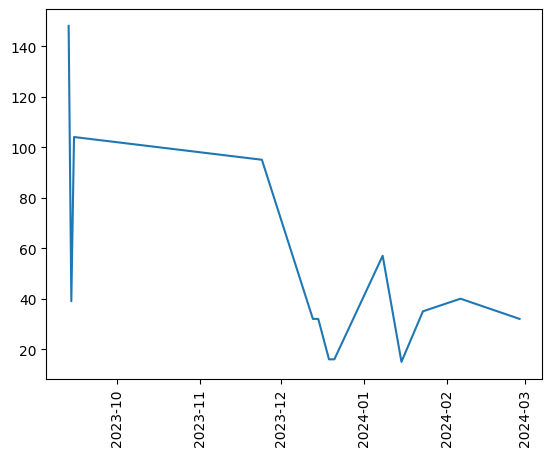

In [19]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
#plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [20]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 7: created_by

In [21]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
created_by,
blta65848e67b47489f,370
blt882749c0616d51f4,291


In [22]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 8: faqs relacionadas

In [23]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
faqs relacionadas,
[],661


In [24]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 9: id vignette

In [25]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
id vignette,


In [26]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 10: intencao contextualizada

In [27]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
intencao contextualizada,


In [28]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 11: menus

In [29]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
menus,


In [30]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 12: palavras chave

In [31]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
palavras chave,


In [32]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 13: pergunta

In [33]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
#pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_values = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_values['len'] = df_values[col_nm].str.len()
print(f"Max len: {df_values['len'].max()}")
df_values

## Percentage of nulls 0.00%

Max len: 84


,pergunta,count,len
0,Quais os benefícios dos cartões Click?,16,38
1,Player's Bank Platinum,16,22
2,Cartão Magalu Platinum (visa),16,29
3,Decathlon Platinum,16,19
4,Samsung Platinum,16,16
...,...,...,...
77,Azul Gold (mastercard),1,22
78,Azul Gold (visa),1,16
79,TIM Platinum (visa),1,19
80,Vivo Platinum (visa),1,20


In [34]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 14: pergunta chave

In [35]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,pergunta chave,count


In [36]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 15: portal

In [37]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 0.00%

,portal,count
0,mobile,661


In [38]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 16: produto

In [39]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_values = df_raw[col_nm].value_counts()
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 0.00%

,produto,count
0,Cartão de Crédito,661


## Hightlights
* Can we use `produto` to filter all QnA related to *Cartâo de Crédito*? DONE!

In [40]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 17: relacionamentos

In [41]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
relacionamentos,
[],661


In [42]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 18: resposta

In [43]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_values = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_values['len'] = df_values[col_nm].str.len()
print(f"Max len: {df_values['len'].max()}")
df_values

## Percentage of nulls 0.00%

Max len: 29237


,resposta,count,len
0,<p><strong>Assunto: Benefícios do cartão de cr...,16,16834
1,"<p>Renda mínima R$ 800,00</p><p>Anuidade Sem a...",16,5107
2,"<p>Renda mínima R$ 800,00&nbsp;</p><p>Anuidade...",16,1624
3,"<p>Renda mínima R$ 800,00</p><p>Anuidade gráti...",16,1975
4,"<p>Renda mínima R$ 1.500,00</p><p></p><p>Anuid...",16,4992
...,...,...,...
87,<p>Anuidade grátis gastando R$2.000/fatura</p>...,1,13099
88,"<p>Renda mínima R$ 800,00</p><p>Sem anuidade</...",1,2430
89,"<p>Renda mínima R$ 800,00</p><p>Sem anuidade</...",1,2961
90,<p>Com o cartão The One você conta com ofertas...,1,715


In [44]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 19: resposta_caixa

In [45]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,resposta_caixa,count


In [46]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 20: resposta computador

In [47]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,resposta computador,count


In [48]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 21: resposta_telefone

In [49]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,resposta_telefone,count


In [50]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 22: rota

In [51]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()

## Percentage of nulls 100.00%

,rota,count


In [52]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 23: segmento

In [53]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
segmento,
['SEM_SEGMENTO'],661


## Hightlights

* What does `segmento` means?
* Do we need to take it into account?

In [54]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 24: tags

In [55]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
tags,
[],584
['final'],45
"['ia gen', 'final']",16
"['final', 'ia gen']",16


In [56]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 25: texto_botao_contextualizada

In [57]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 100.00%

,count
texto_botao_contextualizada,


In [58]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 26: title

In [59]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
title,
[PF] [Benefícios] [IA gen] Benefícios dos cartões Click,15
[PF] [Benefícios] [IA gen] Benefícios dos cartões Pão de Açúcar,15
[PF] [Benefícios] [IA gen] Cartão Magalu Platinum (visa),15
[PF] [Benefícios] [IA gen] Benefícios dos cartões TIM,15
[PF] [Benefícios] [IA gen] Decathlon Platinum,15
...,...
[PF] [Benefícios] Vivo Cashback Platinum (mastercard),1
[PF] [Benefícios] Vivo Cashback Platinum (visa),1
[PF] [Benefícios] Itaú Uniclass Black (mastercard),1


## Hightlights
* Can we use `title` to filter the QnA related to benefits? DONE! No need!

In [60]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 27: titularidade

In [61]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
titularidade,
---,661


In [62]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 28: titulo_atalhos

In [63]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
titulo_atalhos,
[],661


In [64]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 29: top

In [65]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
top,
---,661


In [66]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 30: uid

In [67]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
uid,
blt4f5a77237fdcf7ac,16
blt6b9a467e86335399,16
bltf6d39871e12da4aa,16
blt73a6afc9343cbae0,16
blt5336bb9098c193cc,16
...,...
blt2ffdd94920cc8cb1,1
bltf039a1277cbf2890,1
bltadd2f7fc63d92055,1


In [68]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 31: updated_at

## Percentage of nulls 0.00%

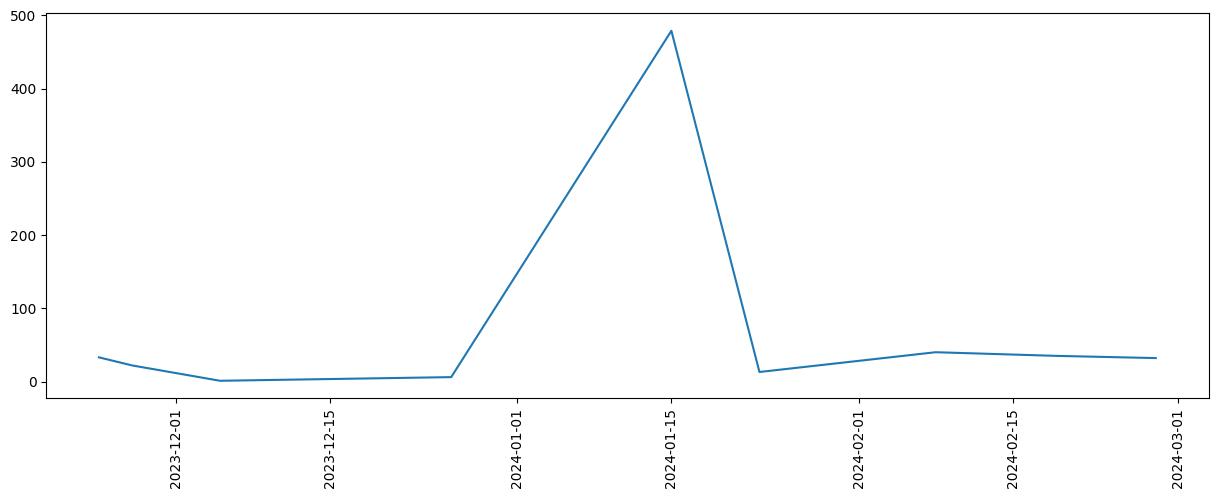

In [69]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [70]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 32: updated_by

In [71]:
null_pct = df_raw[df_raw[col_nm].isna()].shape[0]/df_raw.shape[0]
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
pd.DataFrame(df_raw[col_nm].value_counts())

## Percentage of nulls 0.00%

,count
updated_by,
blta65848e67b47489f,661


In [211]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 33: ingestion_timestamp

## Percentage of nulls 0.00%

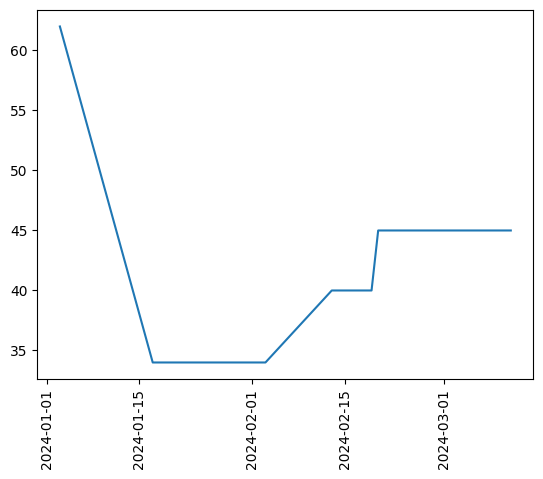

In [212]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index()
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].str[:10]).dt.date
df_date_freq = df_time_freq.groupby('date').sum('count')
#plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

In [213]:
col_nm = df_raw.columns[col_idx]
display(Markdown(f"# Analysis Column {col_idx}: {col_nm}"))
col_idx += 1

# Analysis Column 34: anomesdia

## Percentage of nulls 0.00%

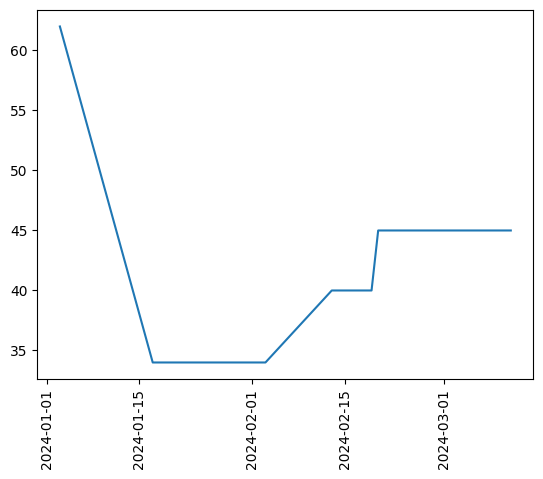

In [214]:
display(Markdown(f"## Percentage of nulls {null_pct:.2%}"))
df_time_freq = pd.DataFrame(df_raw[col_nm].value_counts()).reset_index().sort_values(col_nm)
df_time_freq['date'] = pd.to_datetime(df_time_freq[col_nm].astype(str)).dt.date
df_date_freq = pd.DataFrame(df_time_freq.groupby('date').sum('count')['count'])
#plt.figure(figsize=(15,5))
plt.plot(df_date_freq)
plt.xticks(rotation=90)
pass

# Next Steps
* Create embeddings to questions and answers
* Clustering analysis to experiment the best way to identify QnAs related to credit card benefits.
* Clustering analysis to discover different answers semantically highly correlated.
* Clustering analysis to discover different questions semantically highly correlated.
* Analysis to properly relate questions and answers (is a simple similarity rank enough to related Q n A?